In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

In [114]:
file = os.path.join('Resources','Merged_Data-Country_against_Happiness','merged_data_1.csv')
df = pd.read_csv(file)
df2 = df.set_index('country')
df3 = df2.drop(columns=['Unnamed: 0'])
df3.head()

df3.to_csv('merged_data_2.csv')
df3.head()

,Population,Total Number of Suicides,Number of Suicides per 100K Population,GDP for 2015,GDP per Capita,region,happiness rank,happiness score,economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
country,,,,,,,,,,,,,,,
Switzerland,7892502,1073,164.66,6.792892e+11,86068,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,308554,40,140.65,1.694225e+10,54909,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,5383060,564,121.42,3.012985e+11,55972,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,4882909,590,136.43,3.866631e+11,79187,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Finland,5181797,731,161.19,2.324648e+11,44862,Western Europe,6.0,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


In [115]:
regions = []
regions = df3['region']

regions.unique()    
regions.value_counts()

Western Europe                     17
Central and Eastern Europe         16
Latin America and Caribbean        10
Middle East and Northern Africa     3
Sub-Saharan Africa                  2
Southeastern Asia                   2
North America                       1
Australia and New Zealand           1
Eastern Asia                        1
Name: region, dtype: int64

In [116]:
suicide_per_region = df3.groupby(['region'])['Total Number of Suicides'].agg(['sum'])
suicide_per_region.columns = ['Total Suicides']
    
suicide_per_region.sort_values('Total Suicides', ascending = False)

,Total Suicides
region,
North America,44189
Western Europe,32428
Latin America and Caribbean,27262
Central and Eastern Europe,25866
Eastern Asia,23092
Southeastern Asia,4534
Australia and New Zealand,3027
Middle East and Northern Africa,1940
Sub-Saharan Africa,586


In [117]:
suicides_by_pop_per_region = df3.groupby(['region'])['Number of Suicides per 100K Population'].agg(['sum'])
suicides_by_pop_per_region.columns = ['Suicides by Population']
    
suicides_by_pop_per_region.sort_values('Suicides by Population', ascending = False)

,Suicides by Population
region,
Central and Eastern Europe,3011.02
Western Europe,2123.09
Latin America and Caribbean,1001.26
Eastern Asia,206.04
Southeastern Asia,190.44
North America,175.41
Australia and New Zealand,154.18
Middle East and Northern Africa,113.22
Sub-Saharan Africa,112.97


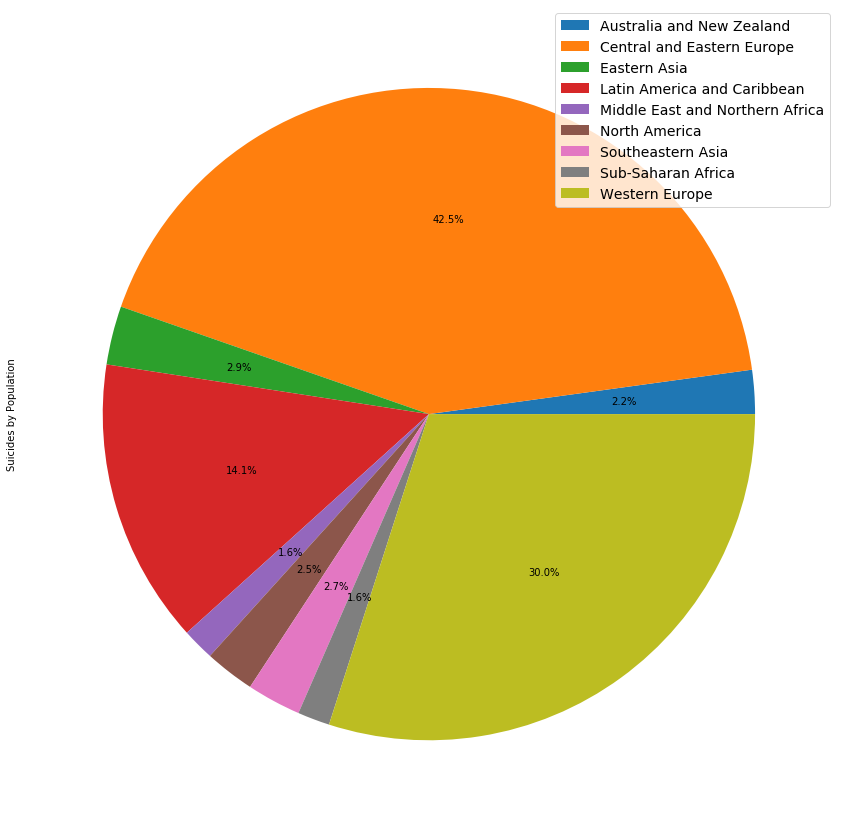

In [156]:
#Suicide by region pie graph
suicides_by_pop_per_region.plot.pie(y='Suicides by Population', labels=None, figsize=(15,15), autopct="%1.1f%%")
plt.legend(labels=suicides_by_pop_per_region.index, loc="best", fontsize=14)

In [96]:
goverment_trust_region = df3.groupby(['region'])['Trust (Government Corruption)'].agg(['mean'])
goverment_trust_region.columns = ['Government Trust']

goverment_trust_region.sort_values('Government Trust', ascending = False)

,Government Trust
region,
Australia and New Zealand,0.356370
Southeastern Asia,0.261985
Middle East and Northern Africa,0.252463
Western Europe,0.247862
Eastern Asia,0.180600
North America,0.158900
Latin America and Caribbean,0.146013
Sub-Saharan Africa,0.082025
Central and Eastern Europe,0.081484


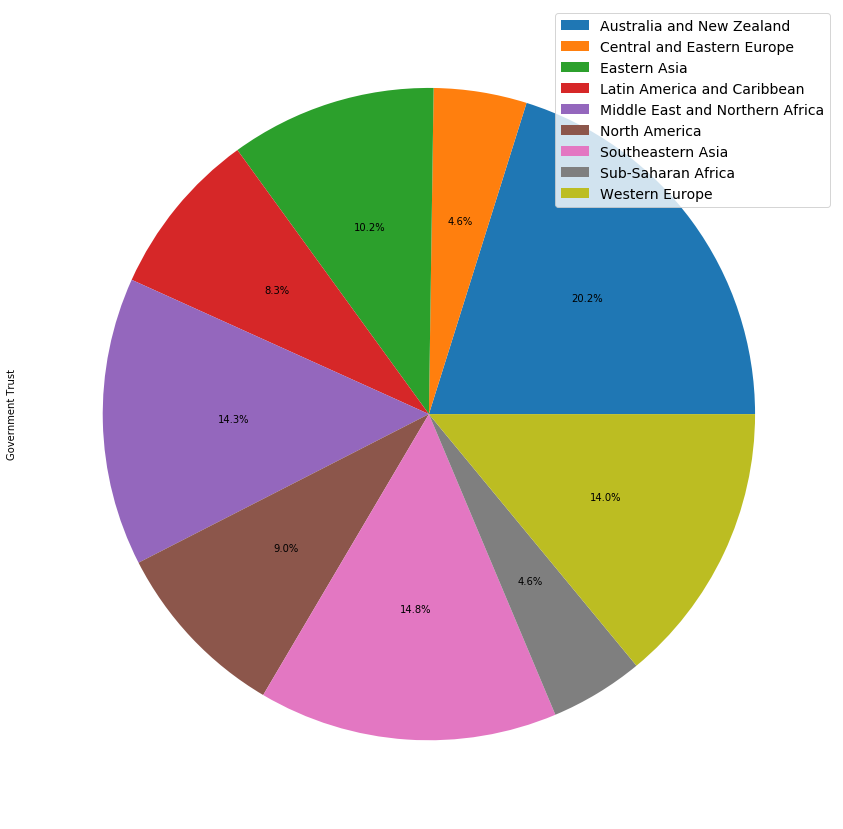

In [158]:
#Regional Feeling of Govermental Trust
goverment_trust_region.plot.pie(y='Government Trust', labels=None, figsize=(15,15), autopct="%1.1f%%")
plt.legend(labels=goverment_trust_region.index, loc="best", fontsize=14)

In [97]:
freedom_region = df3.groupby(['region'])['Freedom'].agg(['mean'])
freedom_region.columns = ['Perceived Freedom']

freedom_region.sort_values('Perceived Freedom', ascending = False)

,Perceived Freedom
region,
Australia and New Zealand,0.651240
Western Europe,0.551506
Southeastern Asia,0.549580
North America,0.546040
Latin America and Caribbean,0.516156
Eastern Asia,0.496150
Sub-Saharan Africa,0.446365
Middle East and Northern Africa,0.427247
Central and Eastern Europe,0.373559


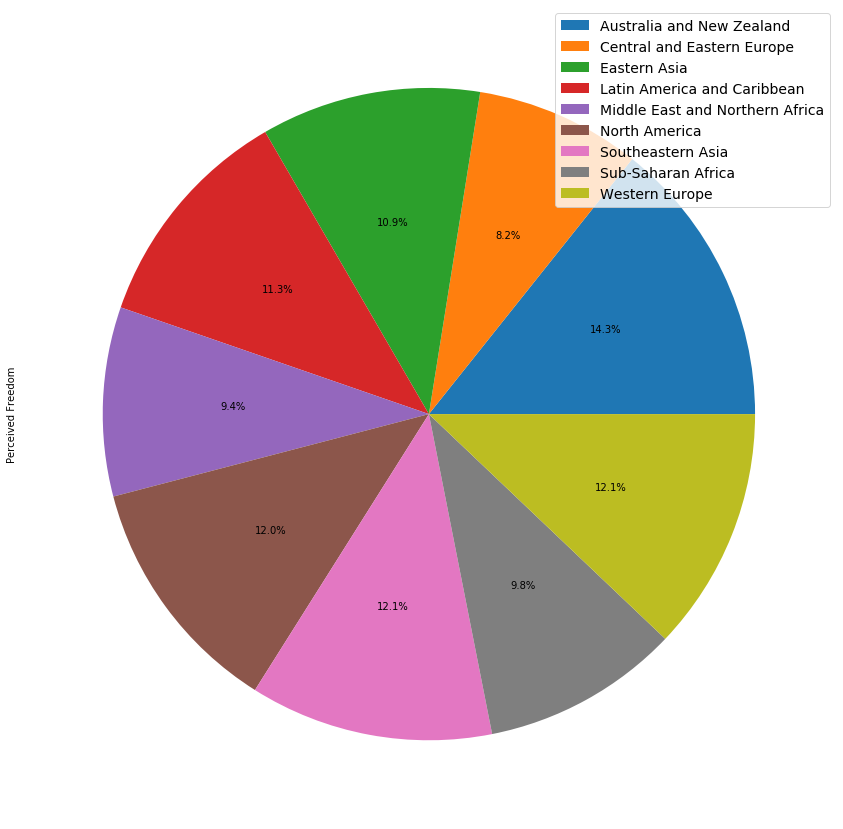

In [159]:
#Regional Feeling of Perceived Freedom
freedom_region.plot.pie(y='Perceived Freedom', labels=None, figsize=(15,15), autopct="%1.1f%%")
plt.legend(labels=freedom_region.index, loc="best", fontsize=14)

In [171]:
rank_region = df3.groupby(['region'])['happiness rank'].agg(['mean'])
rank_region.columns = ['Average Happiness Rank']

rank_region.sort_values('Average Happiness Rank', ascending = True)

,Average Happiness Rank
region,
Australia and New Zealand,10.000000
North America,15.000000
Western Europe,24.647059
Southeastern Asia,29.000000
Latin America and Caribbean,32.500000
Middle East and Northern Africa,38.333333
Eastern Asia,46.000000
Central and Eastern Europe,79.500000
Sub-Saharan Africa,92.000000
